In [4]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [5]:
#To compute de climatoloy
yearC1='2004'
yearC2='2014'

## Read the data

In [6]:
DC=xr.open_dataset('./Data/RG_Global_Jan2004_Marzo2024.nc')

In [7]:
DC_temp=DC.temperature.sel(lat=slice( -60, 60))
DC_salt=DC.salinity.sel(lat=slice( -60, 60))

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [8]:
#Create monthly climatology
DC_temp_clim = DC_temp.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();
DC_salt_clim = DC_salt.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();

#Create anomaly
DC_temp_anom = DC_temp.groupby('time.month') - DC_temp_clim
DC_temp_anom.load();

DC_salt_anom = DC_salt.groupby('time.month') - DC_salt_clim
DC_salt_anom.load();

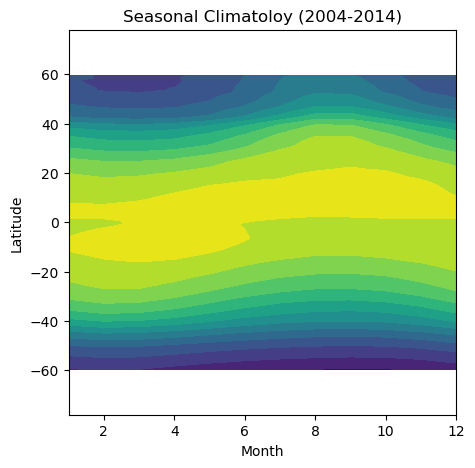

In [9]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(DC_temp_clim.mean(dim='lon').sel(pre=10).month,
                 DC_temp_clim.mean(dim='lon').sel(pre=10).lat,
                 DC_temp_clim.mean(dim='lon').sel(pre=10).transpose(),levels=12, vmin=-2, vmax=30)
ax.set_ylim(-78,78)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + yearC1 + '-' + yearC2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

# Weighted

In [10]:
weights = np.cos(np.deg2rad(DC.temperature.lat))
weights = weights/weights.max()
weights.name = "weights"
DC_temp_weighted = DC_temp.weighted(weights)
DC_salt_weighted = DC_salt.weighted(weights)
DC_temp_anom_weighted = DC_temp_anom.weighted(weights)
DC_salt_anom_weighted = DC_salt_anom.weighted(weights)


DC_temp_wmean = DC_temp_weighted.mean(("lon", "lat"),skipna=True).load()
DC_salt_wmean = DC_salt_weighted.mean(("lon", "lat"),skipna=True).load()

DC_temp_anom_wmean = DC_temp_anom_weighted.mean(("lon", "lat"),skipna=True).load()
DC_salt_anom_wmean = DC_salt_anom_weighted.mean(("lon", "lat"),skipna=True).load()

## smoothed versions

In [11]:
DC_temp_wmean_rolling = DC_temp_wmean.rolling(time=12,center=True).mean()
DC_salt_wmean_rolling = DC_salt_wmean.rolling(time=12,center=True).mean()

DC_temp_anom_wmean_rolling = DC_temp_anom_wmean.rolling(time=12,center=True).mean()
DC_salt_anom_wmean_rolling = DC_salt_anom_wmean.rolling(time=12,center=True).mean()

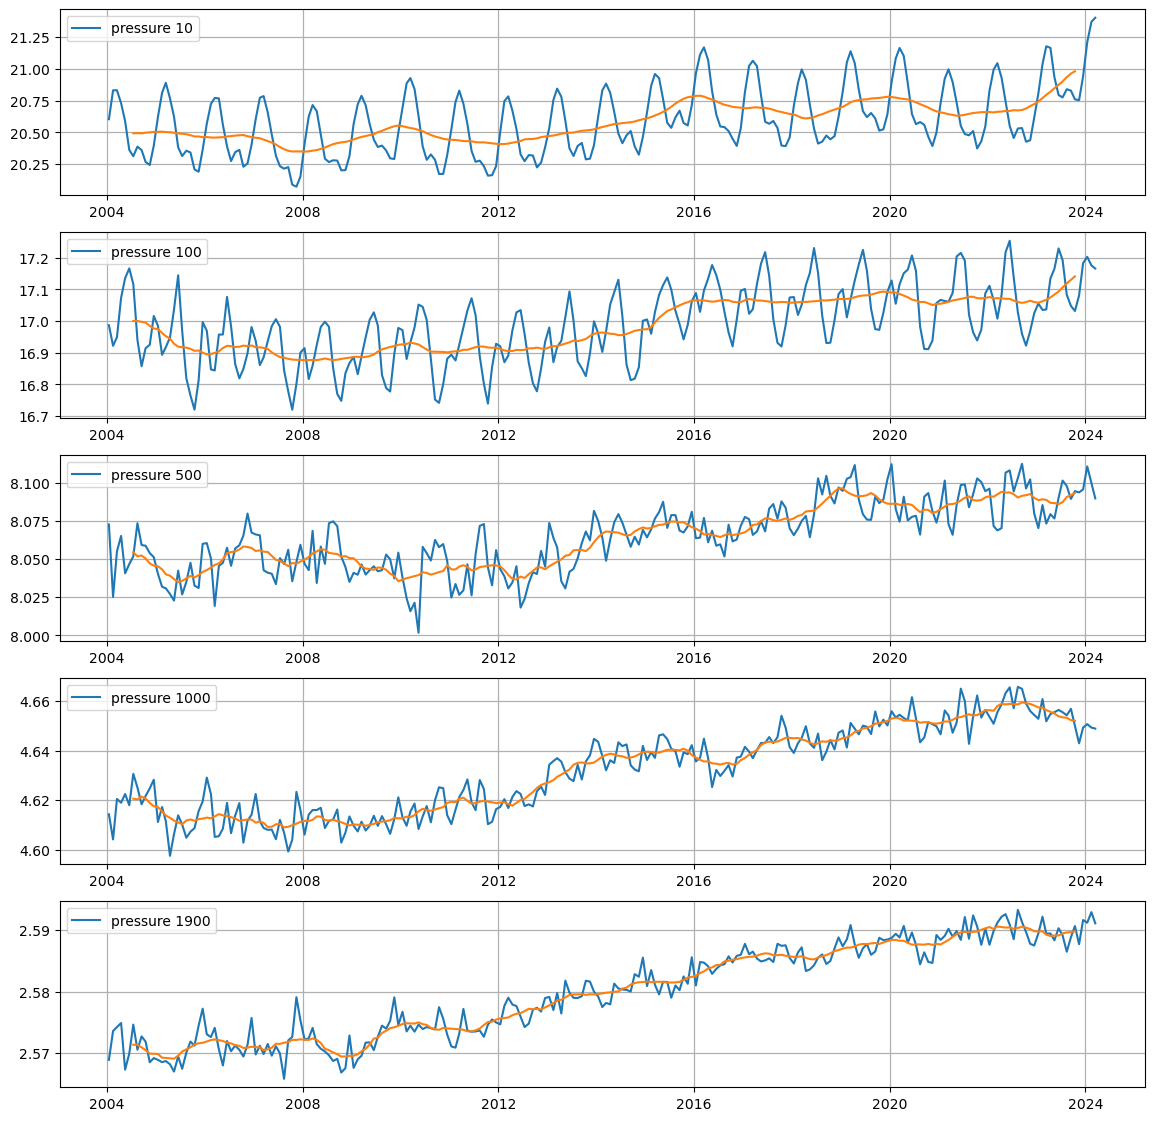

In [12]:
fig, ax = plt.subplots(5 , 1 , figsize = (14,14))
levels = ['10','100','500','1000','1900']
i1=0
for ipre in levels:
    ax[i1].plot(DC.time,DC_temp_wmean.sel(pre=ipre),label=('pressure ' + ipre ))
    ax[i1].plot(DC.time,DC_temp_wmean_rolling.sel(pre=ipre))
    ax[i1].grid(linestyle='-', linewidth=.9)
    #ax[i1].xaxis.set_tick_params(labelbottom=False)
    ax[i1].legend();
    i1=i1+1

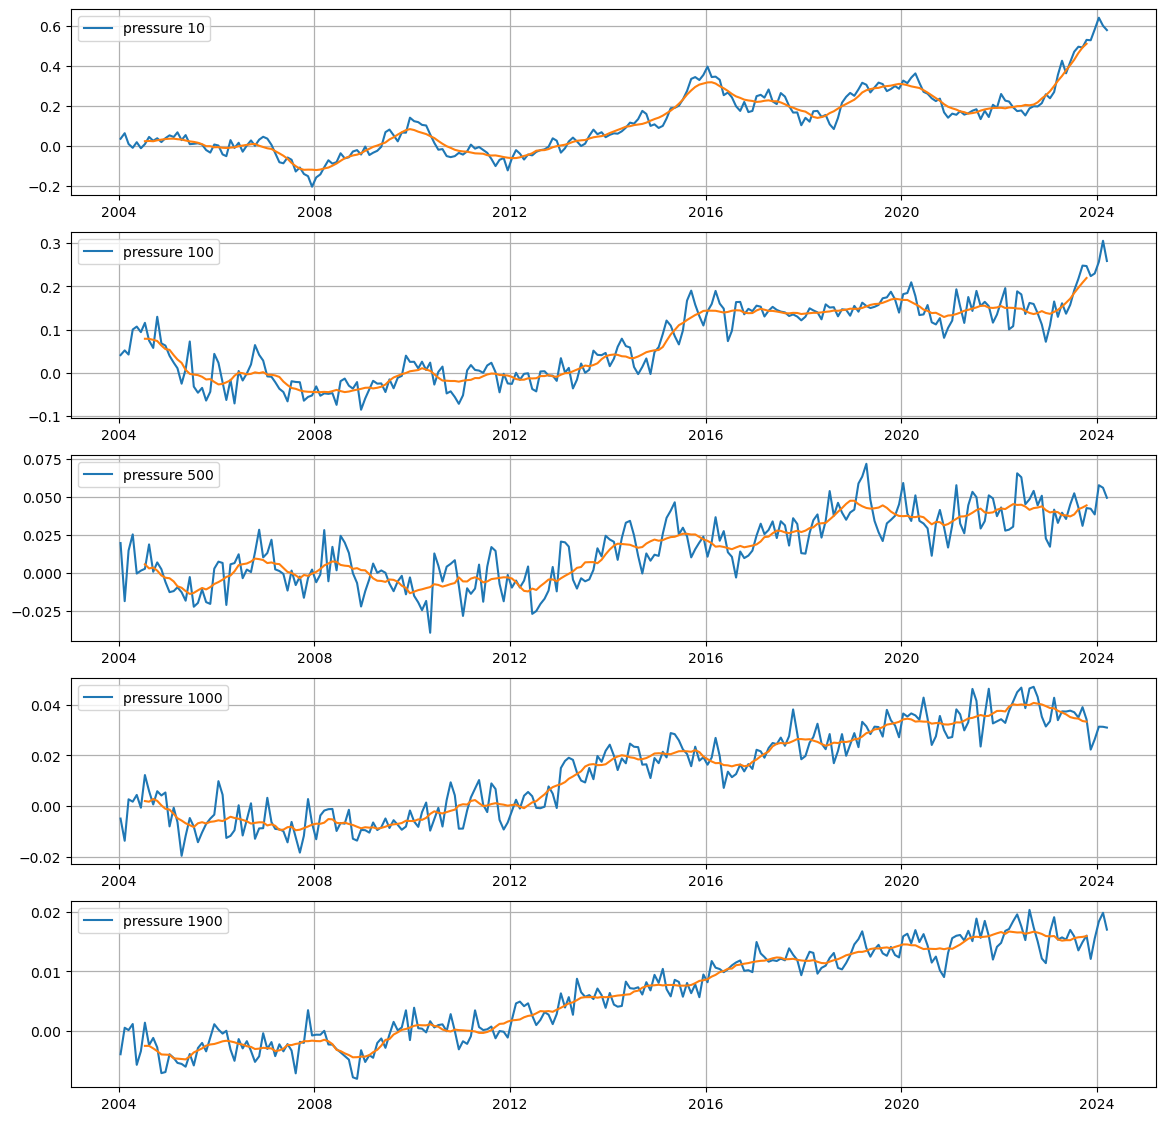

In [13]:
fig, ax = plt.subplots(5 , 1 , figsize = (14,14))
levels = ['10','100','500','1000','1900']
i1=0
for ipre in levels:
    ax[i1].plot(DC.time,DC_temp_anom_wmean.sel(pre=ipre),label=('pressure ' + ipre ))
    ax[i1].plot(DC.time,DC_temp_anom_wmean_rolling.sel(pre=ipre))
    ax[i1].grid(linestyle='-', linewidth=.9)
    #ax[i1].xaxis.set_tick_params(labelbottom=False)
    ax[i1].legend();
    i1=i1+1

## Global mean

In [15]:
DC_temp_global_2000dbar=DC_temp_wmean.mean("pre")
DC_temp_global_2000dbar.to_netcdf('./Data/RG_temp_global_2000dbar.nc')

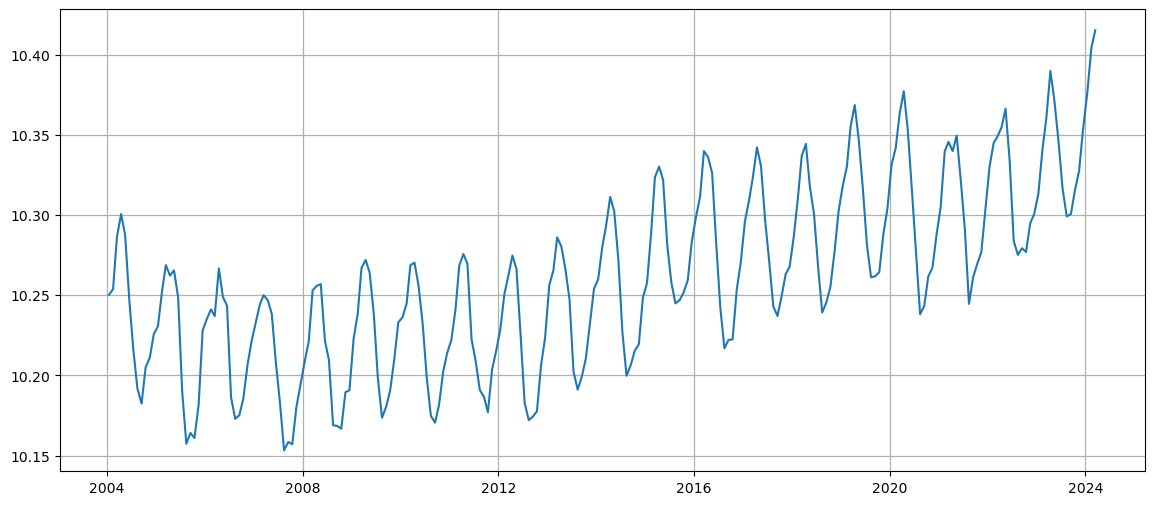

In [16]:
ig, ax = plt.subplots(figsize = (14,6))
ax.plot(DC_temp_global_2000dbar.time,DC_temp_global_2000dbar)
ax.grid(linestyle='-', linewidth=.9)

In [17]:
DC_temp_anom_global_2000dbar=DC_temp_anom_wmean.mean("pre")
DC_temp_anom_global_2000dbar.to_netcdf('./Data/RG_temp_anom_global_2000dbar.nc')

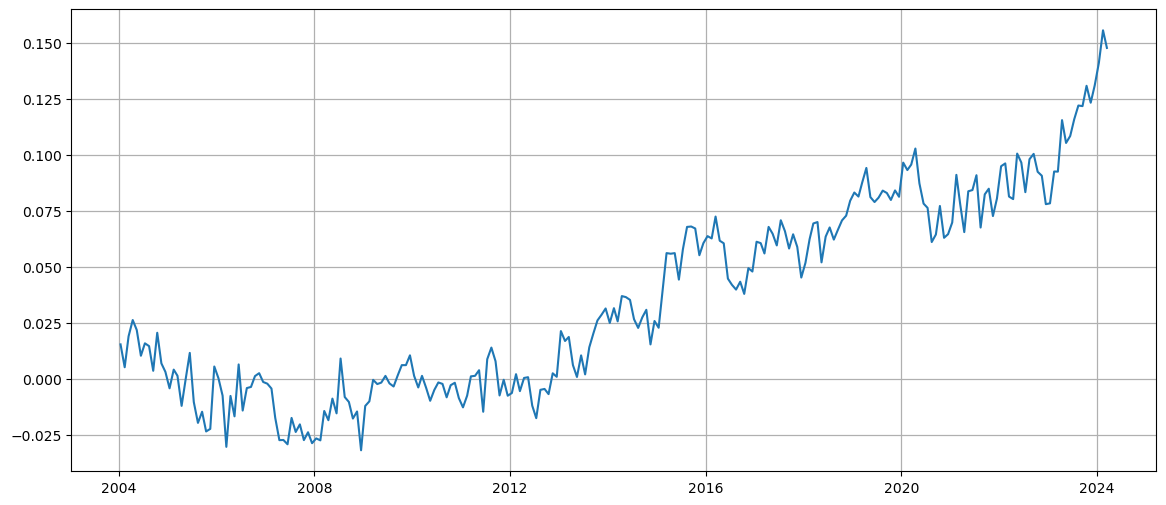

In [18]:
ig, ax = plt.subplots(figsize = (14,6))
ax.plot(DC_temp_anom_global_2000dbar.time,DC_temp_anom_global_2000dbar)
ax.grid(linestyle='-', linewidth=.9)